In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [8]:
t = pd.read_csv('./data/Air_Traffic_Passenger_Statistics.csv')
t.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [9]:
t['Terminal'].unique()

array(['International', 'Terminal 3', 'Terminal 1', 'Terminal 2', 'Other'],
      dtype=object)

In [10]:
t['Price Category Code'].unique()

array(['Other', 'Low Fare'], dtype=object)

In [11]:
t['GEO Region'].unique()

array(['Mexico', 'Europe', 'Middle East', 'Canada', 'Australia / Oceania',
       'Asia', 'US', 'Central America', 'South America'], dtype=object)

In [12]:
t['GEO Summary'].unique()

array(['International', 'Domestic'], dtype=object)

In [13]:
t['Activity Period'].unique()

array([201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501,
       201412, 201411, 201410, 201409, 201408, 201407, 201406, 201405,
       201404, 201403, 201402, 201401, 201312, 201311, 201310, 201309,
       201308, 201307, 201306, 201305, 201304, 201303, 201302, 201301,
       201212, 201211, 201210, 201209, 201208, 201207, 201206, 201205,
       201204, 201203, 201202, 201201, 201112, 201111, 201110, 201109,
       201108, 201107, 201106, 201105, 201104, 201103, 201102, 201101,
       201012, 201011, 201010, 201009, 201008, 201007, 201006, 201005,
       201004, 201003, 201002, 201001, 200912, 200911, 200910, 200909,
      

In [14]:
# in 2018, international terminal
inter = t[(t['Terminal']=='International') & (t['Activity Period']>201800)]
inter.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [15]:
from datetime import datetime
inter.reset_index(inplace=True, drop=True)
inter['Activity Period'] = pd.to_datetime(inter['Activity Period'], format='%Y%m')

/Users/ziyuanhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
inter.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,2018-12-01,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,2018-12-01,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,2018-12-01,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,2018-12-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,2018-12-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [17]:
passenger_by_airline = inter.groupby(['GEO Region']).agg(['sum'])['Passenger Count'].reset_index()
passenger_by_airline.head()

,GEO Region,sum
0,Asia,5558517
1,Australia / Oceania,750051
2,Canada,1287654
3,Central America,377726
4,Europe,3954546


In [18]:
sorted(passenger_by_airline, key = lambda x: x[1])

['GEO Region', 'sum']

In [19]:
end = passenger_by_airline.sort_values(by=['sum'], ascending=False)
end = end[end['GEO Region']!= 'US']

In [20]:
end

,GEO Region,sum
0,Asia,5558517
4,Europe,3954546
2,Canada,1287654
5,Mexico,956748
1,Australia / Oceania,750051
6,Middle East,484219
3,Central America,377726


In [25]:
end

,GEO Region,sum
0,Asia,5558517
4,Europe,3954546
2,Canada,1287654
5,Mexico,956748
1,Australia / Oceania,750051
6,Middle East,484219
3,Central America,377726


In [28]:
end.iloc[2]['GEO Region']

'Canada'

In [36]:
end.drop(index=2, axis=0).to_csv("choro.csv",index=False)

In [30]:
end.rename({'Canada':'North America'}, axis=1)

,GEO Region,sum
0,Asia,5558517
4,Europe,3954546
2,Canada,1287654
5,Mexico,956748
1,Australia / Oceania,750051
6,Middle East,484219
3,Central America,377726


In [22]:
end.to_csv("tree.csv",index=False)

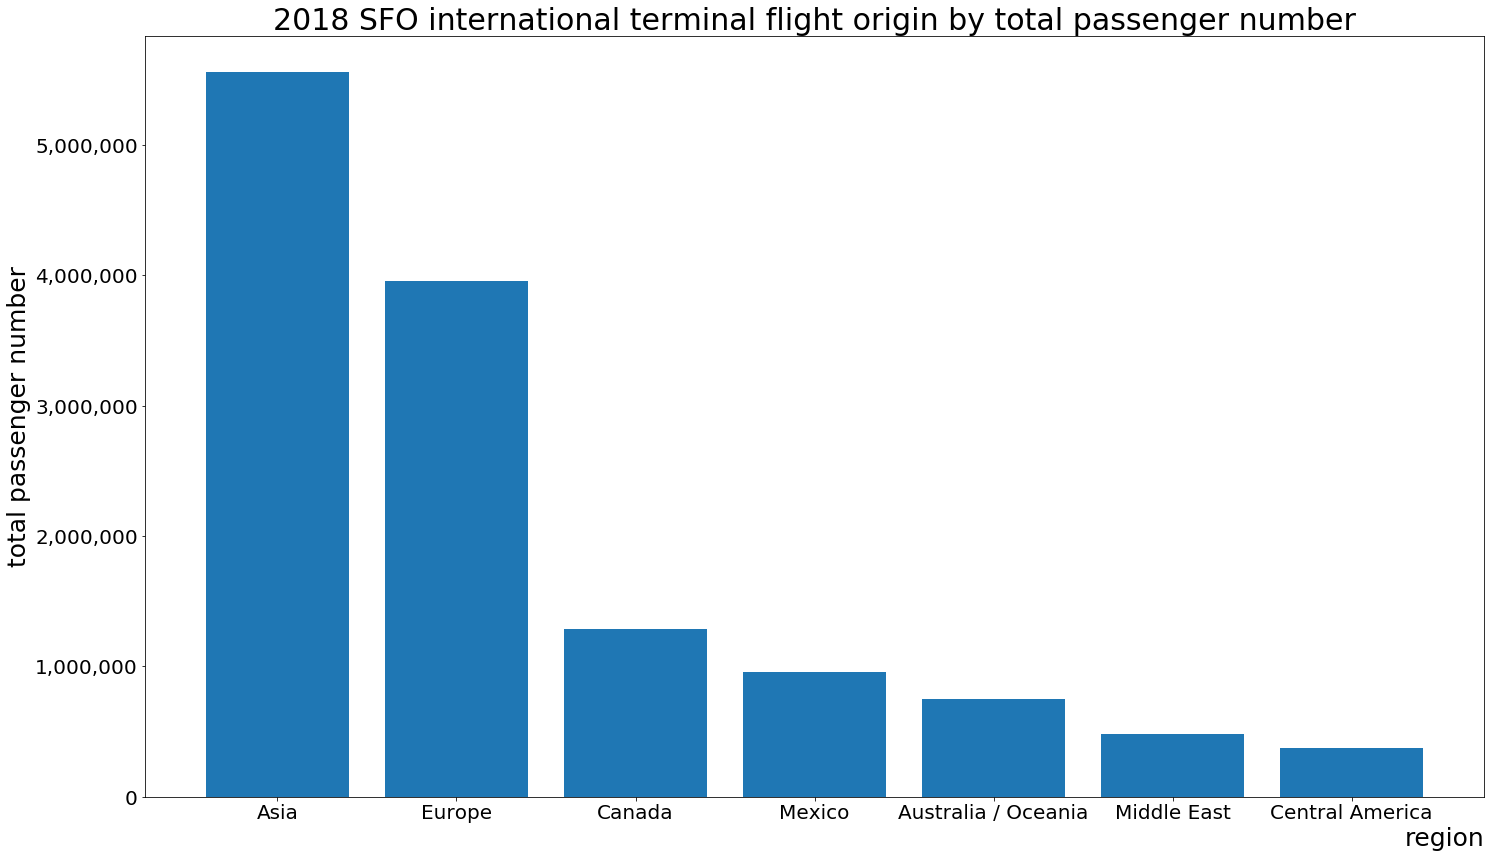

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


x = np.arange(7)
t = end['GEO Region']
s = end['sum']

def millions(x, pos):
    'The two args are the value and tick position'
    return "{:,}".format(int(x))

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(24,14))
ax.yaxis.set_major_formatter(formatter)
plt.title("2018 SFO international terminal flight origin by total passenger number", fontsize=30)
plt.xlabel("region", horizontalalignment='right', x=1.0, y = 10, fontsize=25);
plt.ylabel("total passenger number", fontsize=25);
ax.tick_params(labelsize=20)
plt.bar(x, s)
plt.xticks(x, t)
plt.savefig('bar.png')
plt.show()
